Transfer Learning

In [37]:
# imports necessários
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2

In [38]:
# extração da base de dados
path = '/content/cat_dog_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [39]:
# gerando dataset de treinamento
gerador_treinamento = ImageDataGenerator(rescale = 1./255, rotation_range = 7, horizontal_flip = True, zoom_range = 0.2)
dataset_treinamento = gerador_treinamento.flow_from_directory('/content/cat_dog_2/training_set',
                                                        target_size = (128, 128),
                                                        batch_size = 128,
                                                        class_mode = 'binary',
                                                        shuffle = True)

Found 4000 images belonging to 2 classes.


In [40]:
# classes presentes no dataset de treinamento
dataset_treinamento.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [41]:
# mostrando oque cada classe representa
dataset_treinamento.class_indices

{'cat': 0, 'dog': 1}

In [42]:
# gerando dataset de teste
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory('/content/cat_dog_2/test_set',
                                                     target_size = (128, 128),
                                                     batch_size = 1,
                                                     class_mode = 'binary',
                                                     shuffle = False)

Found 1000 images belonging to 2 classes.


In [43]:
# rede neural pré treinada MobileNetV2 usando os pesos do imageNet
modelo_base = tf.keras.applications.MobileNetV2(weights = 'imagenet', include_top = False,
                                               input_shape = (128,128,3))

In [44]:
# quantidades de camadas
len(modelo_base.layers)

154

In [45]:
# bloqueando as camadas para não retreina-las e não perder os pesos
for layer in modelo_base.layers:
  layer.trainable = False

In [48]:
(1280 + 2) / 2

641.0

In [46]:
# criação das camadas
# Dropout para evitar o Overfitting
# 1280 -> 641 -> 641 -> 1
head_model = modelo_base.output
head_model = tf.keras.layers.GlobalAveragePooling2D()(head_model)
head_model = Dense(641, activation = 'relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(641, activation = 'relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(1, activation = 'sigmoid')(head_model)

In [47]:
network = Model(inputs = modelo_base.input, outputs = head_model)

In [49]:
network.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']         

In [50]:
network.compile(loss = 'binary_crossentropy', optimizer='Adam', 
                metrics = ['accuracy'])

In [51]:
historico = network.fit(dataset_treinamento, epochs=10)

Epoch 1/10
32/32 [==============================] - 25s 699ms/step - loss: 0.2226 - accuracy: 0.9135
Epoch 2/10
32/32 [==============================] - 22s 697ms/step - loss: 0.1043 - accuracy: 0.9585
Epoch 3/10
32/32 [==============================] - 22s 694ms/step - loss: 0.0930 - accuracy: 0.9638
Epoch 4/10
32/32 [==============================] - 22s 675ms/step - loss: 0.0858 - accuracy: 0.9635
Epoch 5/10
32/32 [==============================] - 22s 700ms/step - loss: 0.0622 - accuracy: 0.9747
Epoch 6/10
32/32 [==============================] - 22s 672ms/step - loss: 0.0582 - accuracy: 0.9778
Epoch 7/10
32/32 [==============================] - 23s 718ms/step - loss: 0.0583 - accuracy: 0.9785
Epoch 8/10
32/32 [==============================] - 22s 682ms/step - loss: 0.0554 - accuracy: 0.9785
Epoch 9/10
32/32 [==============================] - 23s 703ms/step - loss: 0.0427 - accuracy: 0.9840
Epoch 10/10
32/32 [==============================] - 21s 667ms/step - loss: 0.0545 - accura

In [52]:
# avaliação da rede
dataset_teste.class_indices

{'cat': 0, 'dog': 1}

In [53]:
previsoes = network.predict(dataset_teste)
previsoes

1000/1000 [==============================] - 8s 7ms/step


array([[2.30875492e-01],
       [9.32683120e-04],
       [2.28575288e-07],
       [1.71121489e-02],
       [8.80296793e-05],
       [3.08121307e-05],
       [3.92724141e-05],
       [3.63706131e-05],
       [7.00578255e-07],
       [4.96847751e-05],
       [2.43627795e-07],
       [1.88448594e-05],
       [7.43302735e-05],
       [3.98747870e-05],
       [2.18597278e-02],
       [3.77416193e-01],
       [7.77597632e-03],
       [6.28399212e-05],
       [1.06063328e-06],
       [5.37703045e-07],
       [2.00100772e-06],
       [3.20215622e-06],
       [1.55230775e-01],
       [4.22207486e-05],
       [2.63843485e-05],
       [3.89084016e-06],
       [4.94680062e-05],
       [2.46742461e-02],
       [1.08015292e-05],
       [6.07776269e-02],
       [3.80251731e-05],
       [7.88947105e-01],
       [1.07555464e-01],
       [8.83719906e-08],
       [9.68455083e-07],
       [3.08342457e-01],
       [4.58175829e-03],
       [2.38214154e-02],
       [1.38228512e-04],
       [2.88667958e-02],


In [54]:
# resultados gerados pela rede
previsoes = (previsoes > 0.5)
previsoes

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [55]:
# resultados da base de teste
dataset_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [56]:
from sklearn.metrics import accuracy_score

accuracy_score(dataset_teste.classes, previsoes)

0.962

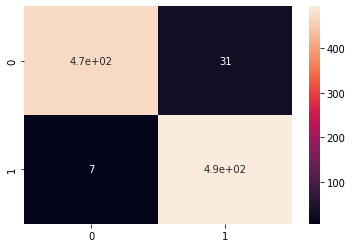

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(dataset_teste.classes, previsoes)
sns.heatmap(cm, annot = True)

In [58]:
from sklearn.metrics import classification_report

print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       500
           1       0.94      0.99      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000

